In [2]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout

In [4]:
dta = pd.read_csv("train.csv")
#keys = pd.read_csv("submission.csv")
dta.shape

(17996, 17)

In [6]:
#remove rows with NA values
dta = dta.dropna()

#shuffle data before splitting into train and test sets
dta = dta.sample(frac=1).reset_index(drop=True)

#remove artist name and song name
dta = dta.iloc[:,2:17]
dta.shape

(11813, 15)

In [8]:
#transforming all songs measured in minutes to milliseconds
dta.loc[dta.iloc[:,12]<400, dta.columns[12]] *= 60000
dta

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,37.0,0.168,0.8130,1.0,-6.856,1,0.0510,0.000361,0.004010,0.0922,0.2910,156.969,417720.0000,4,8
1,25.0,0.400,0.8720,8.0,-6.189,1,0.1200,0.020600,0.227000,0.2950,0.5660,124.096,369013.0000,4,10
2,60.0,0.372,0.8570,5.0,-7.816,0,0.0461,0.060800,0.000090,0.1870,0.3890,146.080,312400.0000,4,8
3,60.0,0.461,0.0727,7.0,-23.646,1,0.0367,0.972000,0.880000,0.1260,0.1930,114.931,151776.0000,4,7
4,21.0,0.484,0.5080,8.0,-12.399,1,0.1100,0.227000,0.000343,0.0620,0.8580,102.073,656560.0002,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11808,40.0,0.772,0.4490,1.0,-10.324,1,0.3660,0.457000,0.000019,0.3430,0.5610,94.736,213438.0000,4,5
11809,39.0,0.111,0.9940,11.0,-4.578,0,0.1490,0.000006,0.091000,0.0633,0.0358,155.106,333893.0000,4,8
11810,28.0,0.407,0.9320,11.0,-6.252,1,0.1130,0.003630,0.346000,0.2290,0.1730,102.954,235214.0000,4,8
11811,35.0,0.475,0.4300,2.0,-10.652,1,0.0252,0.446000,0.322000,0.1260,0.0580,77.951,182000.0000,4,6


In [10]:
#extracting labels (not yet one hot encoded)
y = dta.iloc[:,14]
data = dta.drop("Class", axis = 1)

#one hot encoding function from lecture notes
def to_one_hot(labels, dimension=11):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

#one hot encoding labels
y = to_one_hot(y)
ydf = pd.DataFrame(y, columns = ["Acoustic/Folk","Alternative","Blues","Bollywood","Country","Hip Hop", "Indie", "Instrumental", "Metal", "Pop", "Rock"])
ydf = ydf.astype(int)
ydf.iloc[1:10,]

# one hot encoding categorical features
keycol = data["key"].astype("int")
oh = to_one_hot(keycol, dimension = 12)
timecol = data["time_signature"].astype("int")
tc = to_one_hot(timecol, dimension = 6)


In [12]:
# concatenating one hot encoded features to the feature matrix
oh = pd.DataFrame(oh)
tc = pd.DataFrame(tc)
data = pd.concat([data, oh, tc], axis=1)

In [14]:
# removing categorical features that were one hot encoded
data = data.drop("key", axis = 1)
data = data.drop("time_signature", axis = 1)

# Dropping rows with all zeroes that the one-hot encoding created
data = data.drop(data.columns[24], axis = 1)
data = data.drop(data.columns[24], axis = 1)
data

,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,6,7,8,9,10,11,1,3,4,5
0,37.0,0.168,0.8130,-6.856,1,0.0510,0.000361,0.004010,0.0922,0.2910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,25.0,0.400,0.8720,-6.189,1,0.1200,0.020600,0.227000,0.2950,0.5660,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60.0,0.372,0.8570,-7.816,0,0.0461,0.060800,0.000090,0.1870,0.3890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60.0,0.461,0.0727,-23.646,1,0.0367,0.972000,0.880000,0.1260,0.1930,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,21.0,0.484,0.5080,-12.399,1,0.1100,0.227000,0.000343,0.0620,0.8580,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11808,40.0,0.772,0.4490,-10.324,1,0.3660,0.457000,0.000019,0.3430,0.5610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11809,39.0,0.111,0.9940,-4.578,0,0.1490,0.000006,0.091000,0.0633,0.0358,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11810,28.0,0.407,0.9320,-6.252,1,0.1130,0.003630,0.346000,0.2290,0.1730,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11811,35.0,0.475,0.4300,-10.652,1,0.0252,0.446000,0.322000,0.1260,0.0580,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
#adding one hot encoded features to the feature matrix with less classes
dta = pd.concat([dta, oh, tc], axis=1)
dta = dta.drop("key", axis = 1)
dta = dta.drop("time_signature", axis = 1)

# Dropping rows with all zeroes that the one-hot encoding created. Numbers are 1 higher because the labels are still in this data frame
dta = dta.drop(dta.columns[25], axis = 1)
dta = dta.drop(dta.columns[25], axis = 1)
dta

,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,6,7,8,9,10,11,1,3,4,5
0,37.0,0.168,0.8130,-6.856,1,0.0510,0.000361,0.004010,0.0922,0.2910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,25.0,0.400,0.8720,-6.189,1,0.1200,0.020600,0.227000,0.2950,0.5660,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60.0,0.372,0.8570,-7.816,0,0.0461,0.060800,0.000090,0.1870,0.3890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60.0,0.461,0.0727,-23.646,1,0.0367,0.972000,0.880000,0.1260,0.1930,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,21.0,0.484,0.5080,-12.399,1,0.1100,0.227000,0.000343,0.0620,0.8580,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11808,40.0,0.772,0.4490,-10.324,1,0.3660,0.457000,0.000019,0.3430,0.5610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11809,39.0,0.111,0.9940,-4.578,0,0.1490,0.000006,0.091000,0.0633,0.0358,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11810,28.0,0.407,0.9320,-6.252,1,0.1130,0.003630,0.346000,0.2290,0.1730,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11811,35.0,0.475,0.4300,-10.652,1,0.0252,0.446000,0.322000,0.1260,0.0580,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
dta.shape
data.shape

(11813, 26)

In [20]:
# Converting to tensors
X = tf.convert_to_tensor(data.values)
y = tf.convert_to_tensor(y)

#Splitting train and test sets
Xtrain = X[:10000]
Xtest = X[10000:]
Ytrain = y[:10000]
Ytest = y[10000:]

# adapting the standardising function to fit Xtrain
norm = layers.Normalization()
norm.adapt(Xtrain)

2025-05-14 18:41:26.349484: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [22]:
Xtest.shape

TensorShape([1813, 26])

In [24]:
from tensorflow.keras.optimizers import Adam

# Using Functional API to build a network and train it
optimizer = Adam(learning_rate=0.00001)
inputs = keras.Input(shape=(26,))
x = norm(inputs)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
x = Dropout(0.2)(x)
x = layers.Dense(32, activation="relu")(x)
x = Dropout(0.3)(x)
outputs = layers.Dense(11, activation = "softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=optimizer,
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(Xtrain, Ytrain,
          epochs=200,
          batch_size=1,
          validation_split=0.2)

Epoch 1/200
8000/8000 [==============================] - 8s 908us/step - loss: 2.4089 - accuracy: 0.1090 - val_loss: 2.3591 - val_accuracy: 0.2015
Epoch 2/200
8000/8000 [==============================] - 6s 789us/step - loss: 2.3195 - accuracy: 0.2164 - val_loss: 2.2636 - val_accuracy: 0.3015
Epoch 3/200
8000/8000 [==============================] - 6s 795us/step - loss: 2.2263 - accuracy: 0.2635 - val_loss: 2.1530 - val_accuracy: 0.3170
Epoch 4/200
8000/8000 [==============================] - 7s 878us/step - loss: 2.1464 - accuracy: 0.2853 - val_loss: 2.0651 - val_accuracy: 0.3195
Epoch 5/200
8000/8000 [==============================] - 7s 816us/step - loss: 2.0819 - accuracy: 0.2884 - val_loss: 1.9952 - val_accuracy: 0.3300
Epoch 6/200
8000/8000 [==============================] - 6s 805us/step - loss: 2.0285 - accuracy: 0.2999 - val_loss: 1.9400 - val_accuracy: 0.3355
Epoch 7/200
8000/8000 [==============================] - 8s 945us/step - loss: 1.9968 - accuracy: 0.2985 - val_loss: 1

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 26)]              0         
                                                                 
 normalization (Normalizatio  (None, 26)               53        
 n)                                                              
                                                                 
 dense (Dense)               (None, 128)               3456      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                             

57/57 [==============================] - 0s 869us/step


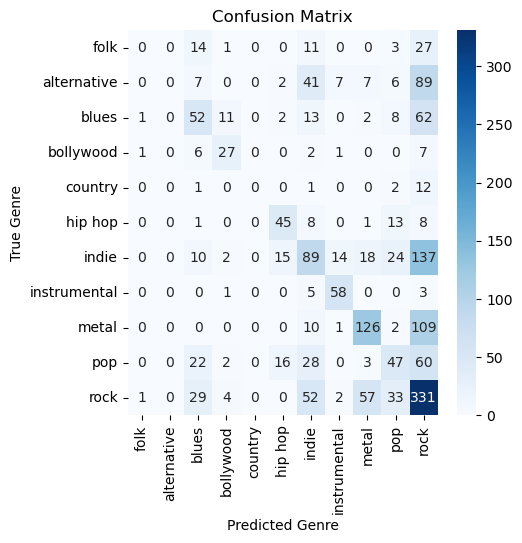

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# generating confusion matrix
probabilities = model.predict(Xtest)
predictions = np.argmax(probabilities, axis=1)
labels = np.argmax(Ytest, axis=1)
mat = confusion_matrix(labels, predictions)
genres = ["folk", "alternative", "blues", "bollywood", "country", "hip hop", "indie", "instrumental", "metal", "pop", "rock"]
plt.figure(figsize=(5,5))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", cbar=True, 
            xticklabels=genres, 
            yticklabels=genres)
plt.xlabel("Predicted Genre")
plt.ylabel("True Genre")
plt.title("Confusion Matrix")
plt.show()

In [32]:
# reducing the number of classes. Removing folk, alternative, bollywood, and country
takeout = {0,1,3,4}
df = dta[~dta["Class"].isin(takeout)]

# estimating test accuracy
model.evaluate(Xtest, Ytest)

57/57 [==============================] - 0s 761us/step - loss: 1.5066 - accuracy: 0.4275


[1.5066072940826416, 0.42746827006340027]

In [34]:
#extracting labels
y = df.iloc[:,12]

In [36]:
#removing labels that were extracted
df = df.drop("Class", axis = 1)

In [38]:
y = to_one_hot(y)

In [42]:
#converting to tensors and splitting into train and test sets
X = tf.convert_to_tensor(df.values)
y = tf.convert_to_tensor(y)
Xtrain = X[:7000]
Xtest = X[7000:]
Ytrain = y[:7000]
Ytest = y[7000:]
norm = layers.Normalization()
norm.adapt(Xtrain)

In [44]:
Xtrain.shape

TensorShape([7000, 26])

In [48]:
#training the network on the dataset with fewer classes
optimizer = Adam(learning_rate=0.00001)
inputs = keras.Input(shape=(26,))
x = norm(inputs)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
x = Dropout(0.2)(x)
x = layers.Dense(31, activation="relu")(x)
x = Dropout(0.3)(x)
outputs = layers.Dense(11, activation = "softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=optimizer,
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(Xtrain, Ytrain,
          epochs=200,
          batch_size=1,
          validation_split=0.2)

Epoch 1/200
5600/5600 [==============================] - 7s 1ms/step - loss: 2.3088 - accuracy: 0.1543 - val_loss: 2.1770 - val_accuracy: 0.3371
Epoch 2/200
5600/5600 [==============================] - 7s 1ms/step - loss: 2.1021 - accuracy: 0.2707 - val_loss: 1.9427 - val_accuracy: 0.3464
Epoch 3/200
5600/5600 [==============================] - 5s 822us/step - loss: 1.9320 - accuracy: 0.3073 - val_loss: 1.7886 - val_accuracy: 0.3464
Epoch 4/200
5600/5600 [==============================] - 5s 823us/step - loss: 1.8370 - accuracy: 0.3109 - val_loss: 1.7129 - val_accuracy: 0.3471
Epoch 5/200
5600/5600 [==============================] - 4s 797us/step - loss: 1.7781 - accuracy: 0.3095 - val_loss: 1.6634 - val_accuracy: 0.3471
Epoch 6/200
5600/5600 [==============================] - 4s 794us/step - loss: 1.7292 - accuracy: 0.3198 - val_loss: 1.6247 - val_accuracy: 0.3479
Epoch 7/200
5600/5600 [==============================] - 5s 843us/step - loss: 1.6990 - accuracy: 0.3248 - val_loss: 1.591

93/93 [==============================] - 0s 598us/step


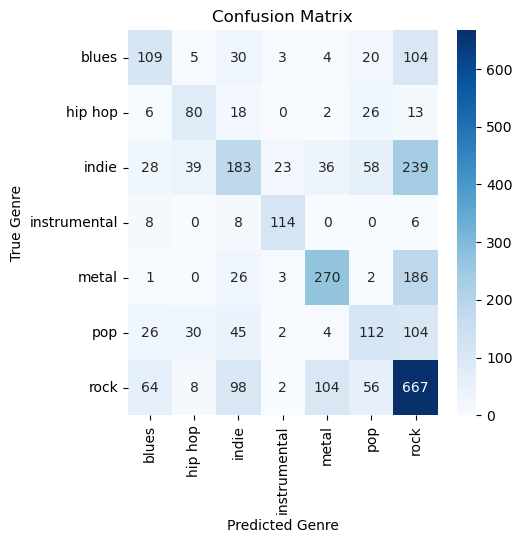

In [50]:
#Generating the confusion matrix for the model with fewer classes
probabilities = model.predict(Xtest)
predictions = np.argmax(probabilities, axis=1)
labels = np.argmax(Ytest, axis=1)
mat = confusion_matrix(labels, predictions)

genres = ["blues","hip hop", "indie", "instrumental", "metal", "pop", "rock"]

plt.figure(figsize=(5,5))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", cbar=True, 
            xticklabels=genres, 
            yticklabels=genres)
plt.xlabel("Predicted Genre")
plt.ylabel("True Genre")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# estimating test accuracy
model.evaluate(Xtest, Ytest)